<h1 > Electronic Vehicle Analysis and Projection in Washington DC </h1>

<h2> Research Questions</h2>
    - What factors influence CAFV Eligibility?
  

### Import Libraries

In [35]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
#Loading the Dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250654,7SAYGDEE7S,Franklin,Pasco,WA,99301.0,2025,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,274986323,POINT (-119.09467 46.23542),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
250655,2C4RC1L77J,Pierce,Tacoma,WA,98407.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,27.0,128901748,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
250656,7SAYGDEF6P,Pierce,Bonney Lake,WA,98391.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,258537660,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
250657,WBY8P6C54K,King,Seattle,WA,98117.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153.0,0.0,36.0,477080334,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [37]:
df.shape

(250659, 17)

In [38]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [39]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Base MSRP                                             21
Legislative District                                 583
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64

In [40]:
df1 = df.dropna()

In [41]:
df1.select_dtypes('float64').describe()

,Postal Code,Electric Range,Base MSRP,Legislative District,2020 Census Tract
count,250047.000000,250047.000000,250047.000000,250047.000000,2.500470e+05
mean,98272.731662,44.062692,726.621075,28.995309,5.304018e+10
std,313.761216,82.401054,6914.671992,14.862286,1.657140e+07
min,98001.000000,0.000000,0.000000,1.000000,5.300195e+10
25%,98052.000000,0.000000,0.000000,18.000000,5.303301e+10
50%,98126.000000,0.000000,0.000000,33.000000,5.303303e+10
75%,98382.000000,37.000000,0.000000,42.000000,5.305394e+10
max,99403.000000,337.000000,845000.000000,49.000000,5.307794e+10


### Data Visualization: EDA

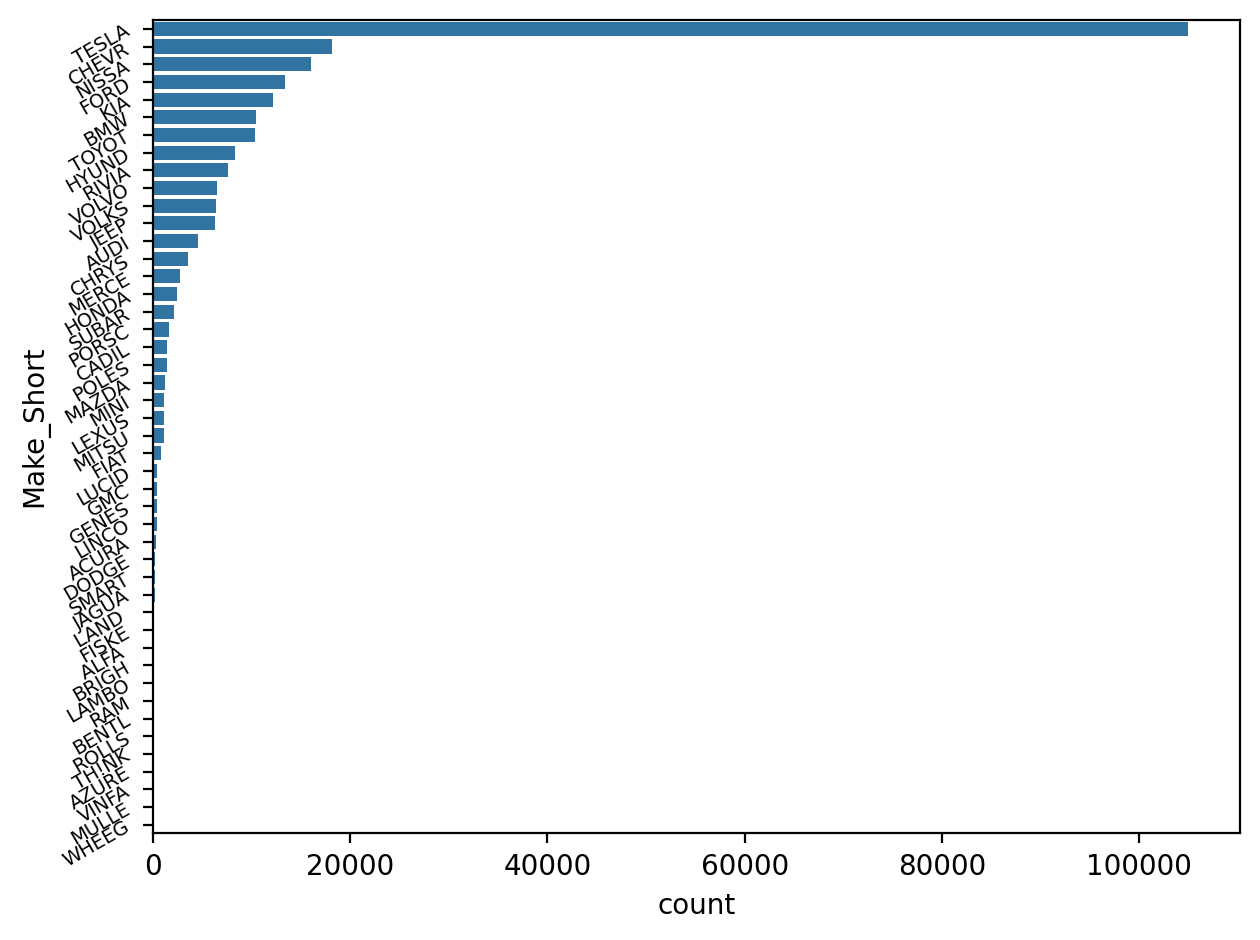

In [43]:
import seaborn as sns
df1['Make_Short'] = df1['Make'].str[:5]  # Show first 10 characters
sns.countplot(data=df1, y='Make_Short', order=df1['Make_Short'].value_counts().index)
plt.yticks(rotation=30, ha='right')
plt.yticks(fontsize=7)
plt.tight_layout() 
plt.show()

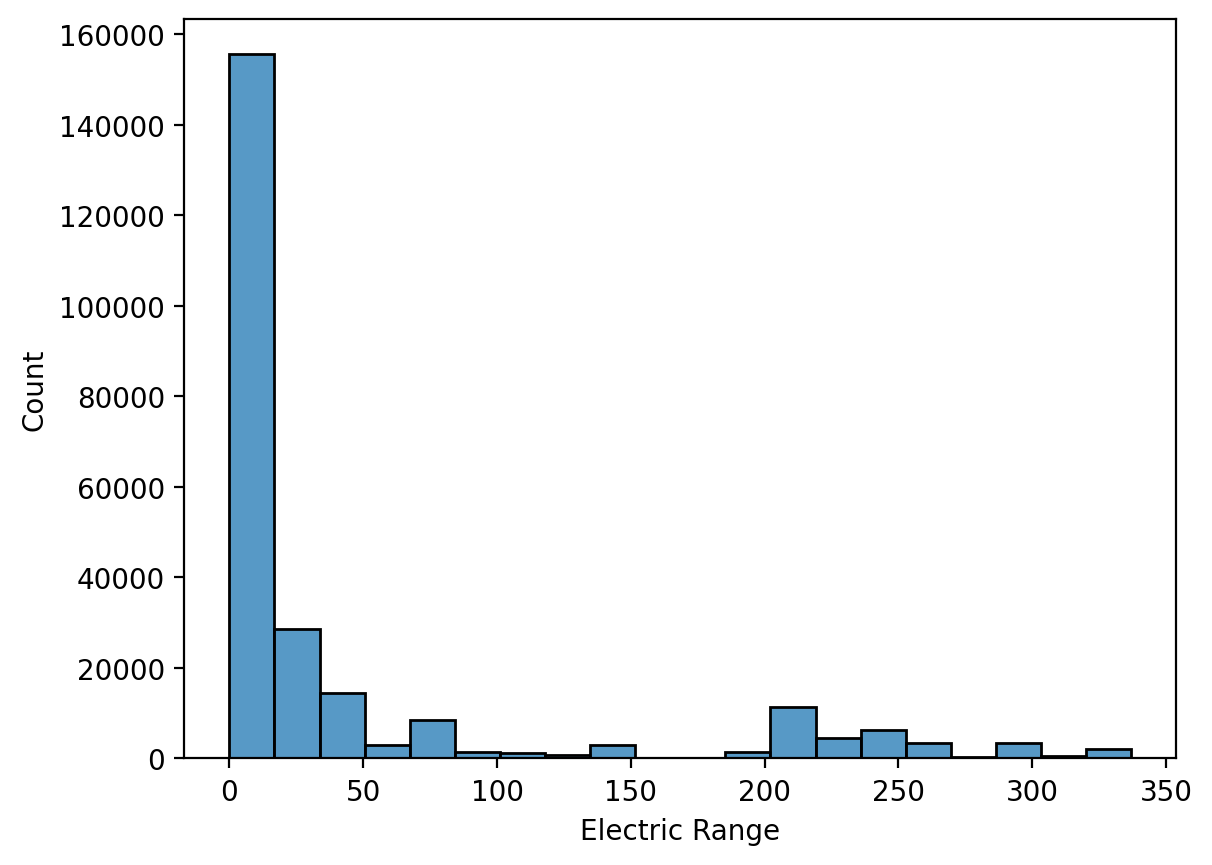

In [44]:
sns.histplot(data=df1, x='Electric Range', bins=20)
plt.show()

In [45]:
!pip install geopandas

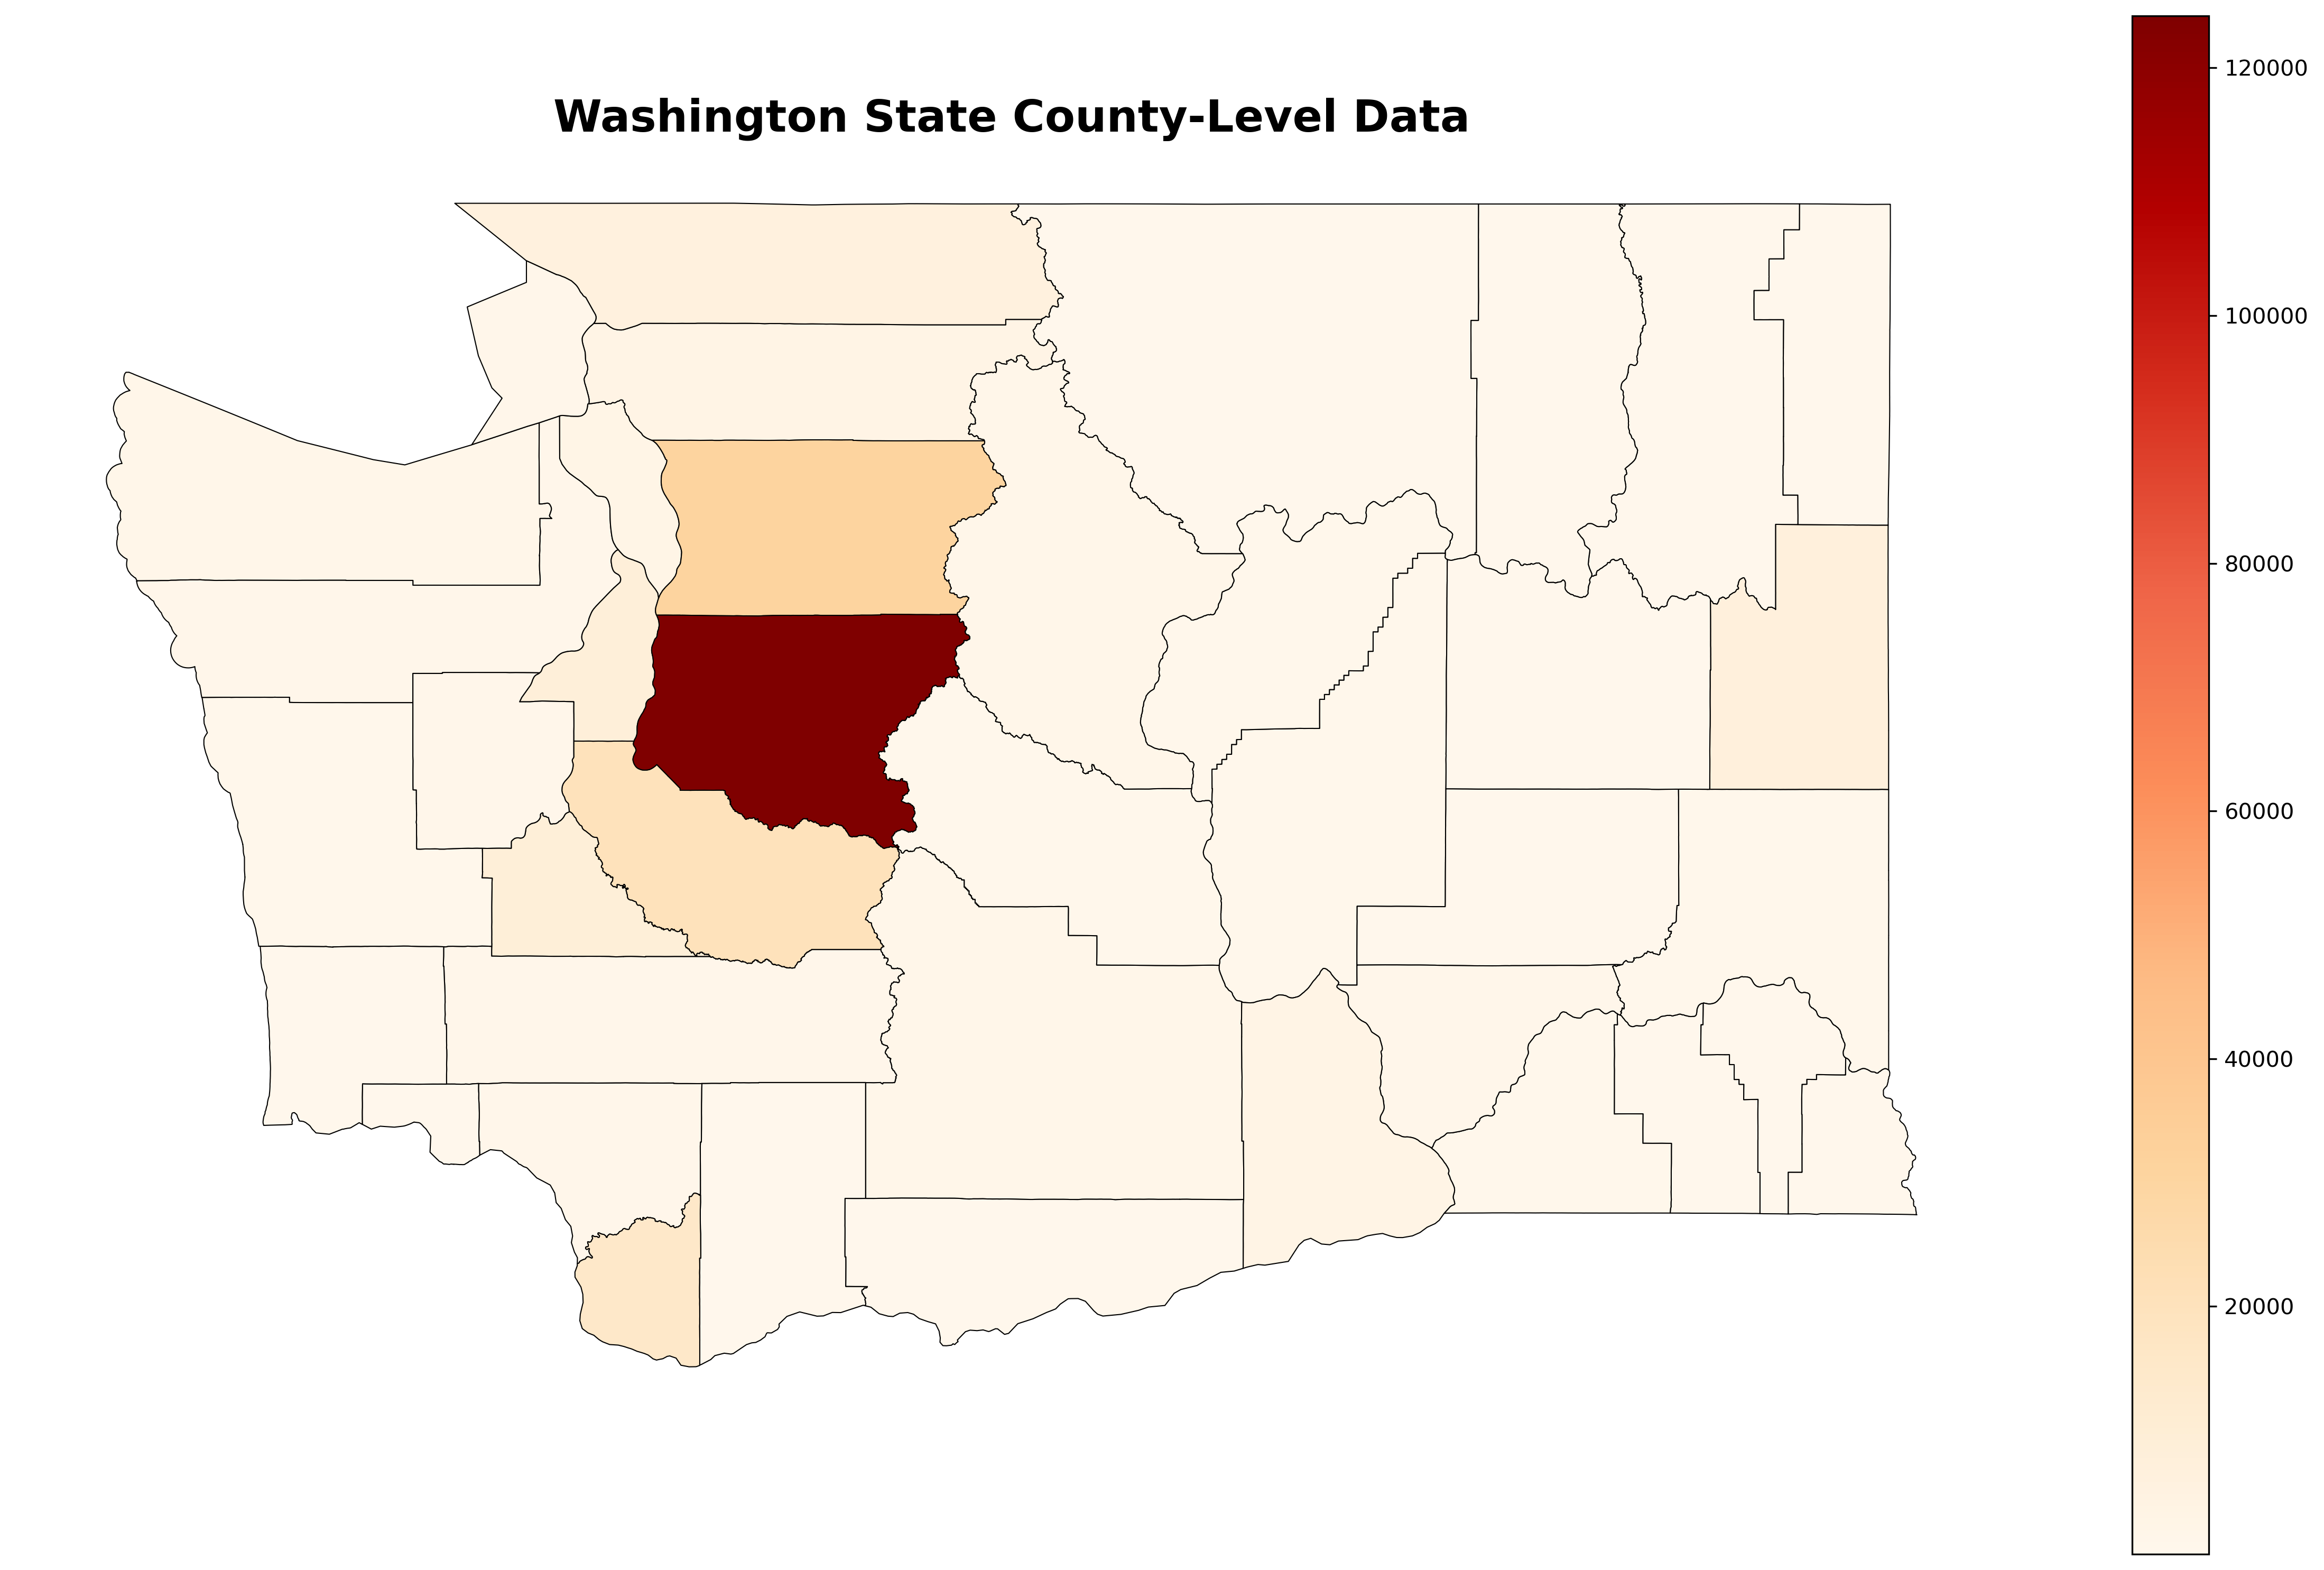

In [46]:
# Jupyter-specific: Render inline & high resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the GeoJSON file
wa_map = gpd.read_file('us-county-boundaries.geojson')

if 'state_name' in wa_map.columns:
    wa_map = wa_map[wa_map['state_name'].str.lower() == 'washington']

# Preprocess county names 
wa_map['name'] = wa_map['name'].str.lower().str.strip().str.replace(' county', '', regex=False)
df1['County'] = df1['County'].str.lower().str.strip().str.replace(' county', '', regex=False)

# Compute county-level counts
county_counts = df1['County'].value_counts().reset_index()
county_counts.columns = ['County', 'Count']

# Merge counts with map data
merged = wa_map.merge(county_counts, how='left', left_on='name', right_on='County')

# Plotting
fig, ax = plt.subplots(figsize=(16, 10), dpi=150)

# Plot with color map and legend
merged.plot(
    column='Count',
    cmap='OrRd',         
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data"
    }
)

# Title and styling
ax.set_title("Washington State County-Level Data", fontsize=20, fontweight='bold')
ax.set_axis_off()

# Legend tweak
leg = ax.get_legend()

# Tight layout and show
plt.tight_layout()
plt.show()

The visualization identifies the hotspot areas with maximum Electric Vehicle Registration.

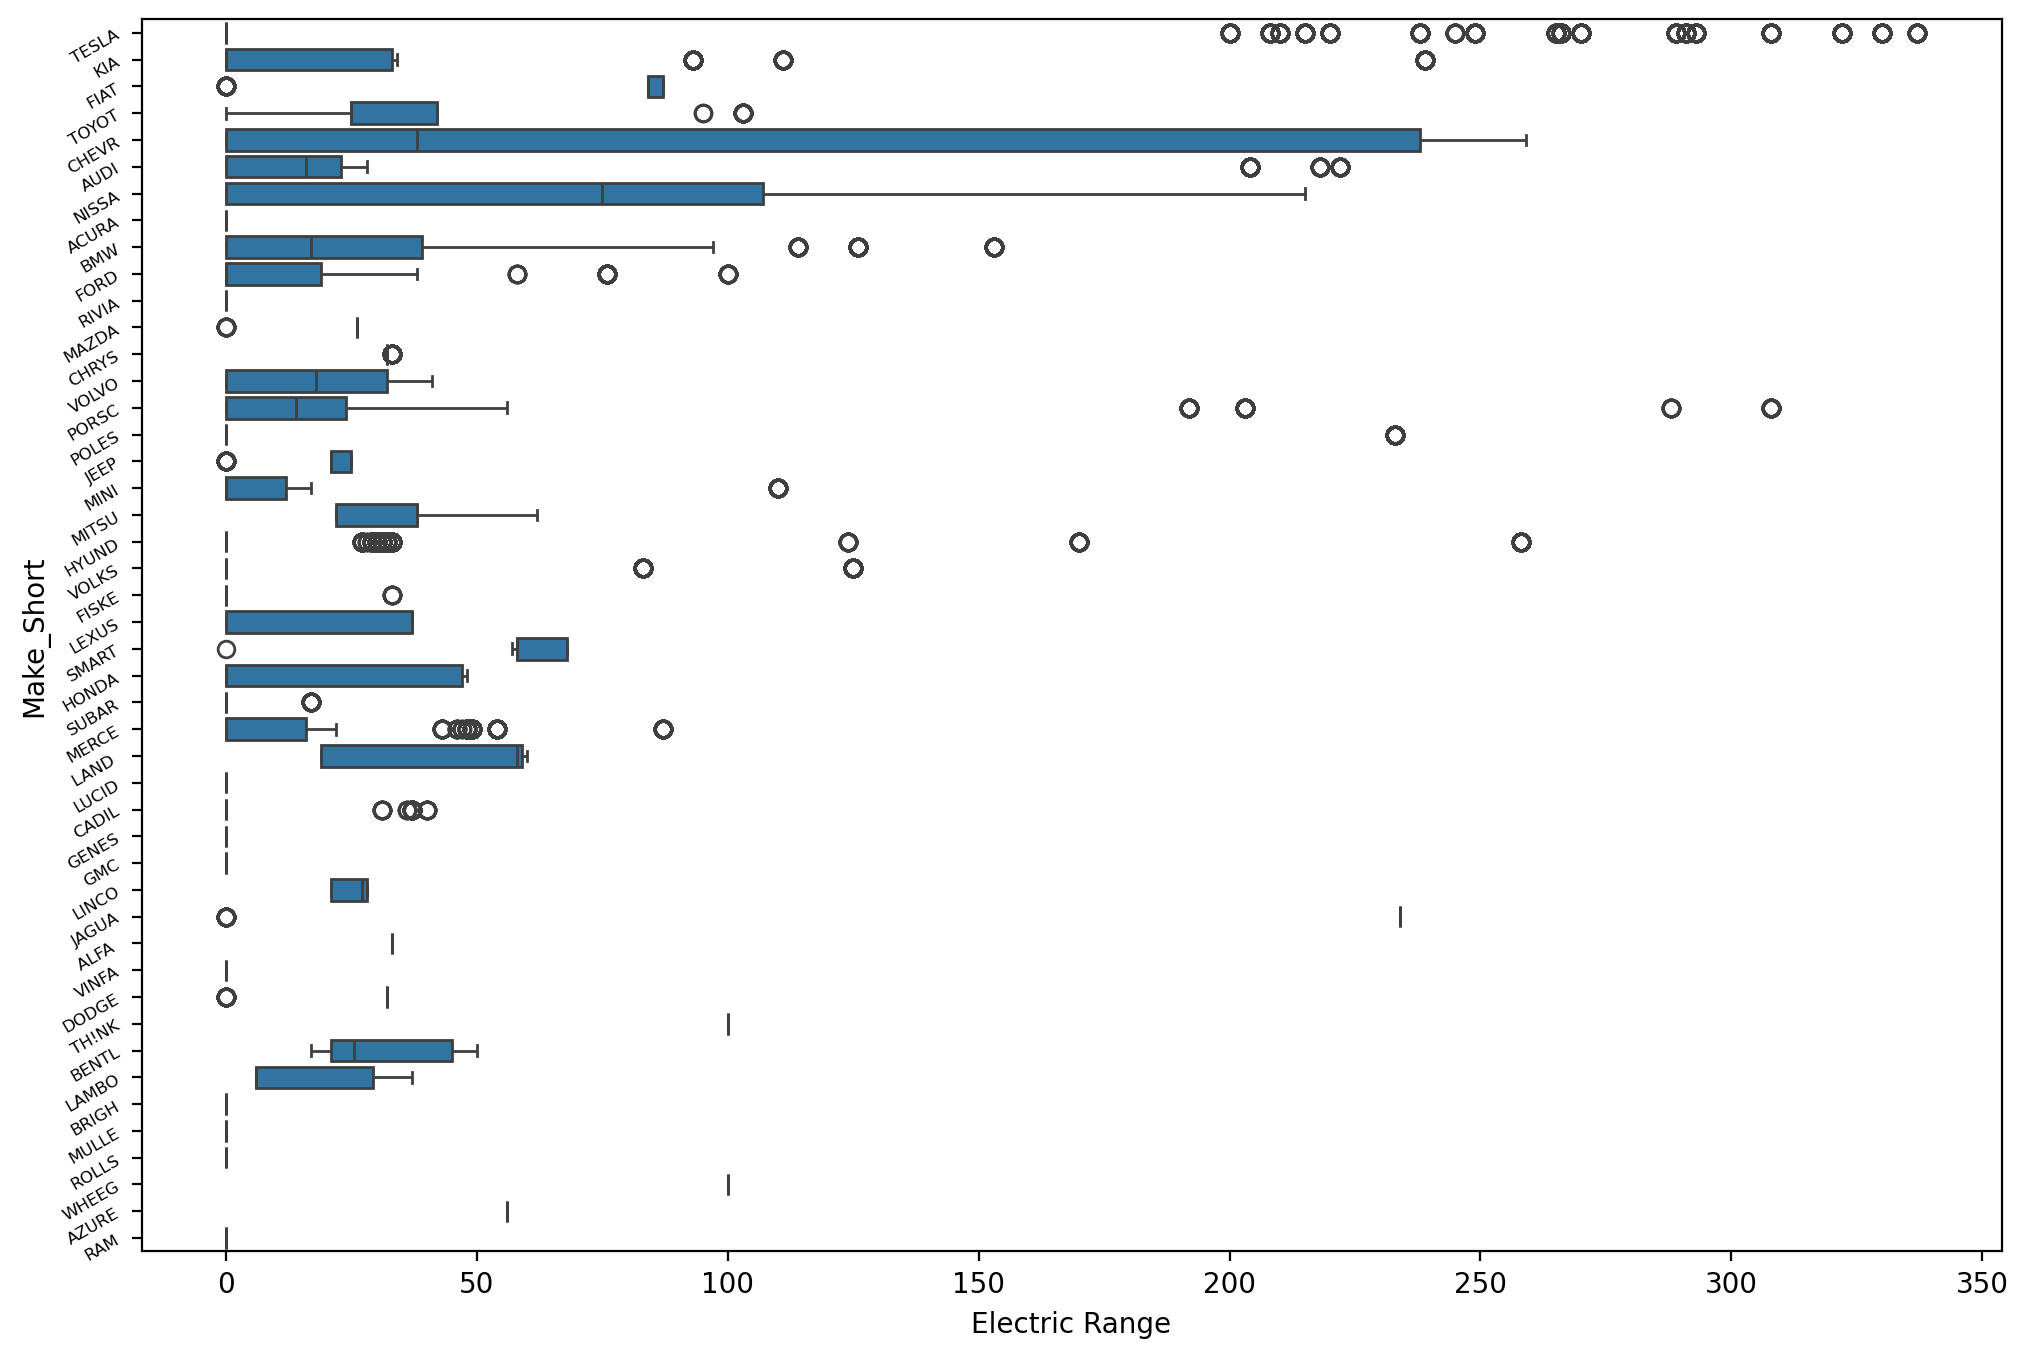

In [48]:
df1['Make_Short'] = df1['Make'].str[:5]
plt.figure(figsize=(12, 8))
plt.yticks(rotation=30, ha='right')
plt.yticks(fontsize=6)
sns.boxplot(data=df1, x='Electric Range', y='Make_Short')
plt.show()

The visualization throws light into the outliers present into the dataset. The outliers will be handled by IQR method

In [50]:
def handle_outliers_iqr(df1, column, group_column, multiplier=1.5):
    """
    Handle outliers using the IQR method for each group in the DataFrame.
    
    Parameters:
    - df1: Input DataFrame
    - column: Column name to process for outliers
    - group_column: Column name to group by
    - multiplier: IQR multiplier (default 1.5)
    
    Returns:
    - DataFrame with outliers replaced by the upper/lower bounds
    """
    
    # Validate inputs
    if not isinstance(df1, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")
    if column not in df1.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")
    if group_column not in df1.columns:
        raise ValueError(f"Group column '{group_column}' not found in DataFrame")
    
    # Create a copy of the DataFrame
    df_clean = df1.copy()
    
    # Check for non-numeric data
    if not np.issubdtype(df_clean[column].dtype, np.number):
        raise ValueError(f"Column '{column}' must be numeric")
    
    # Group by the specified column
    grouped = df_clean.groupby(group_column, group_keys=False)
    
    # Function to replace outliers in each group
    def replace_outliers(group):
        # Skip if group is too small or has no variability
        if len(group) < 4:
            return group
            
        q1 = group[column].quantile(0.25)
        q3 = group[column].quantile(0.75)
        iqr = q3 - q1
        
        # Handle case where IQR is 0 (all values same)
        if iqr == 0:
            return group
            
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        
        # Replace outliers
        mask_low = group[column] < lower_bound
        mask_high = group[column] > upper_bound
        group.loc[mask_low, column] = lower_bound
        group.loc[mask_high, column] = upper_bound
        
        return group
    
    # Apply the outlier replacement
    try:
        df_clean = grouped.apply(replace_outliers)
        # Reset index if needed (preserves original index if important)
        df_clean = df_clean.reset_index(drop=True)
        return df_clean
    except Exception as e:
        print(f"Error during outlier processing: {str(e)}")
        return df1  # Return original if error occurs

In [51]:
# Call the function and verify the output
df_clean = handle_outliers_iqr(df, 
                              column='Electric Range', 
                              group_column='Make')

# Check if anything changed
print("Original stats:")
print(df['Electric Range'].describe())
print("\nCleaned stats:")
print(df_clean['Electric Range'].describe())

# Verify some known outliers
sample_outliers = df.nlargest(5, 'Electric Range')
print("\nOriginal outlier values:")
print(sample_outliers[['Make', 'Electric Range']])
print("\nCleaned outlier values:")
print(df_clean.loc[sample_outliers.index, ['Make', 'Electric Range']])

Original stats:
count    250638.000000
mean         44.073002
std          82.412875
min           0.000000
25%           0.000000
50%           0.000000
75%          37.000000
max         337.000000
Name: Electric Range, dtype: float64

Cleaned stats:
count    250638.000000
mean         42.687861
std          80.738564
min           0.000000
25%           0.000000
50%           0.000000
75%          37.000000
max         337.000000
Name: Electric Range, dtype: float64

Original outlier values:
        Make  Electric Range
3864   TESLA           337.0
10425  TESLA           337.0
11874  TESLA           337.0
18600  TESLA           337.0
20522  TESLA           337.0

Cleaned outlier values:
        Make  Electric Range
3864   TESLA           337.0
10425  TESLA           337.0
11874  TESLA           337.0
18600  TESLA           337.0
20522  TESLA           337.0


In [52]:
df_clean.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
5,5YJXCAE29L,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,23.0,1843054,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10
6,5YJ3E1EB6L,King,Kent,WA,98030.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,47.0,182822020,POINT (-122.19975 47.37483),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,JTDKN3DP9F,Kitsap,Bainbridge Island,WA,98110.0,2015,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,23.0,177904170,POINT (-122.521 47.62732),PUGET SOUND ENERGY INC,5.303509e+10
8,1G1FY6S07L,Kitsap,Port Orchard,WA,98367.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,26.0,132558002,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
9,1G1RD6S55K,Yakima,Yakima,WA,98908.0,2019,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,14.0,474853417,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10


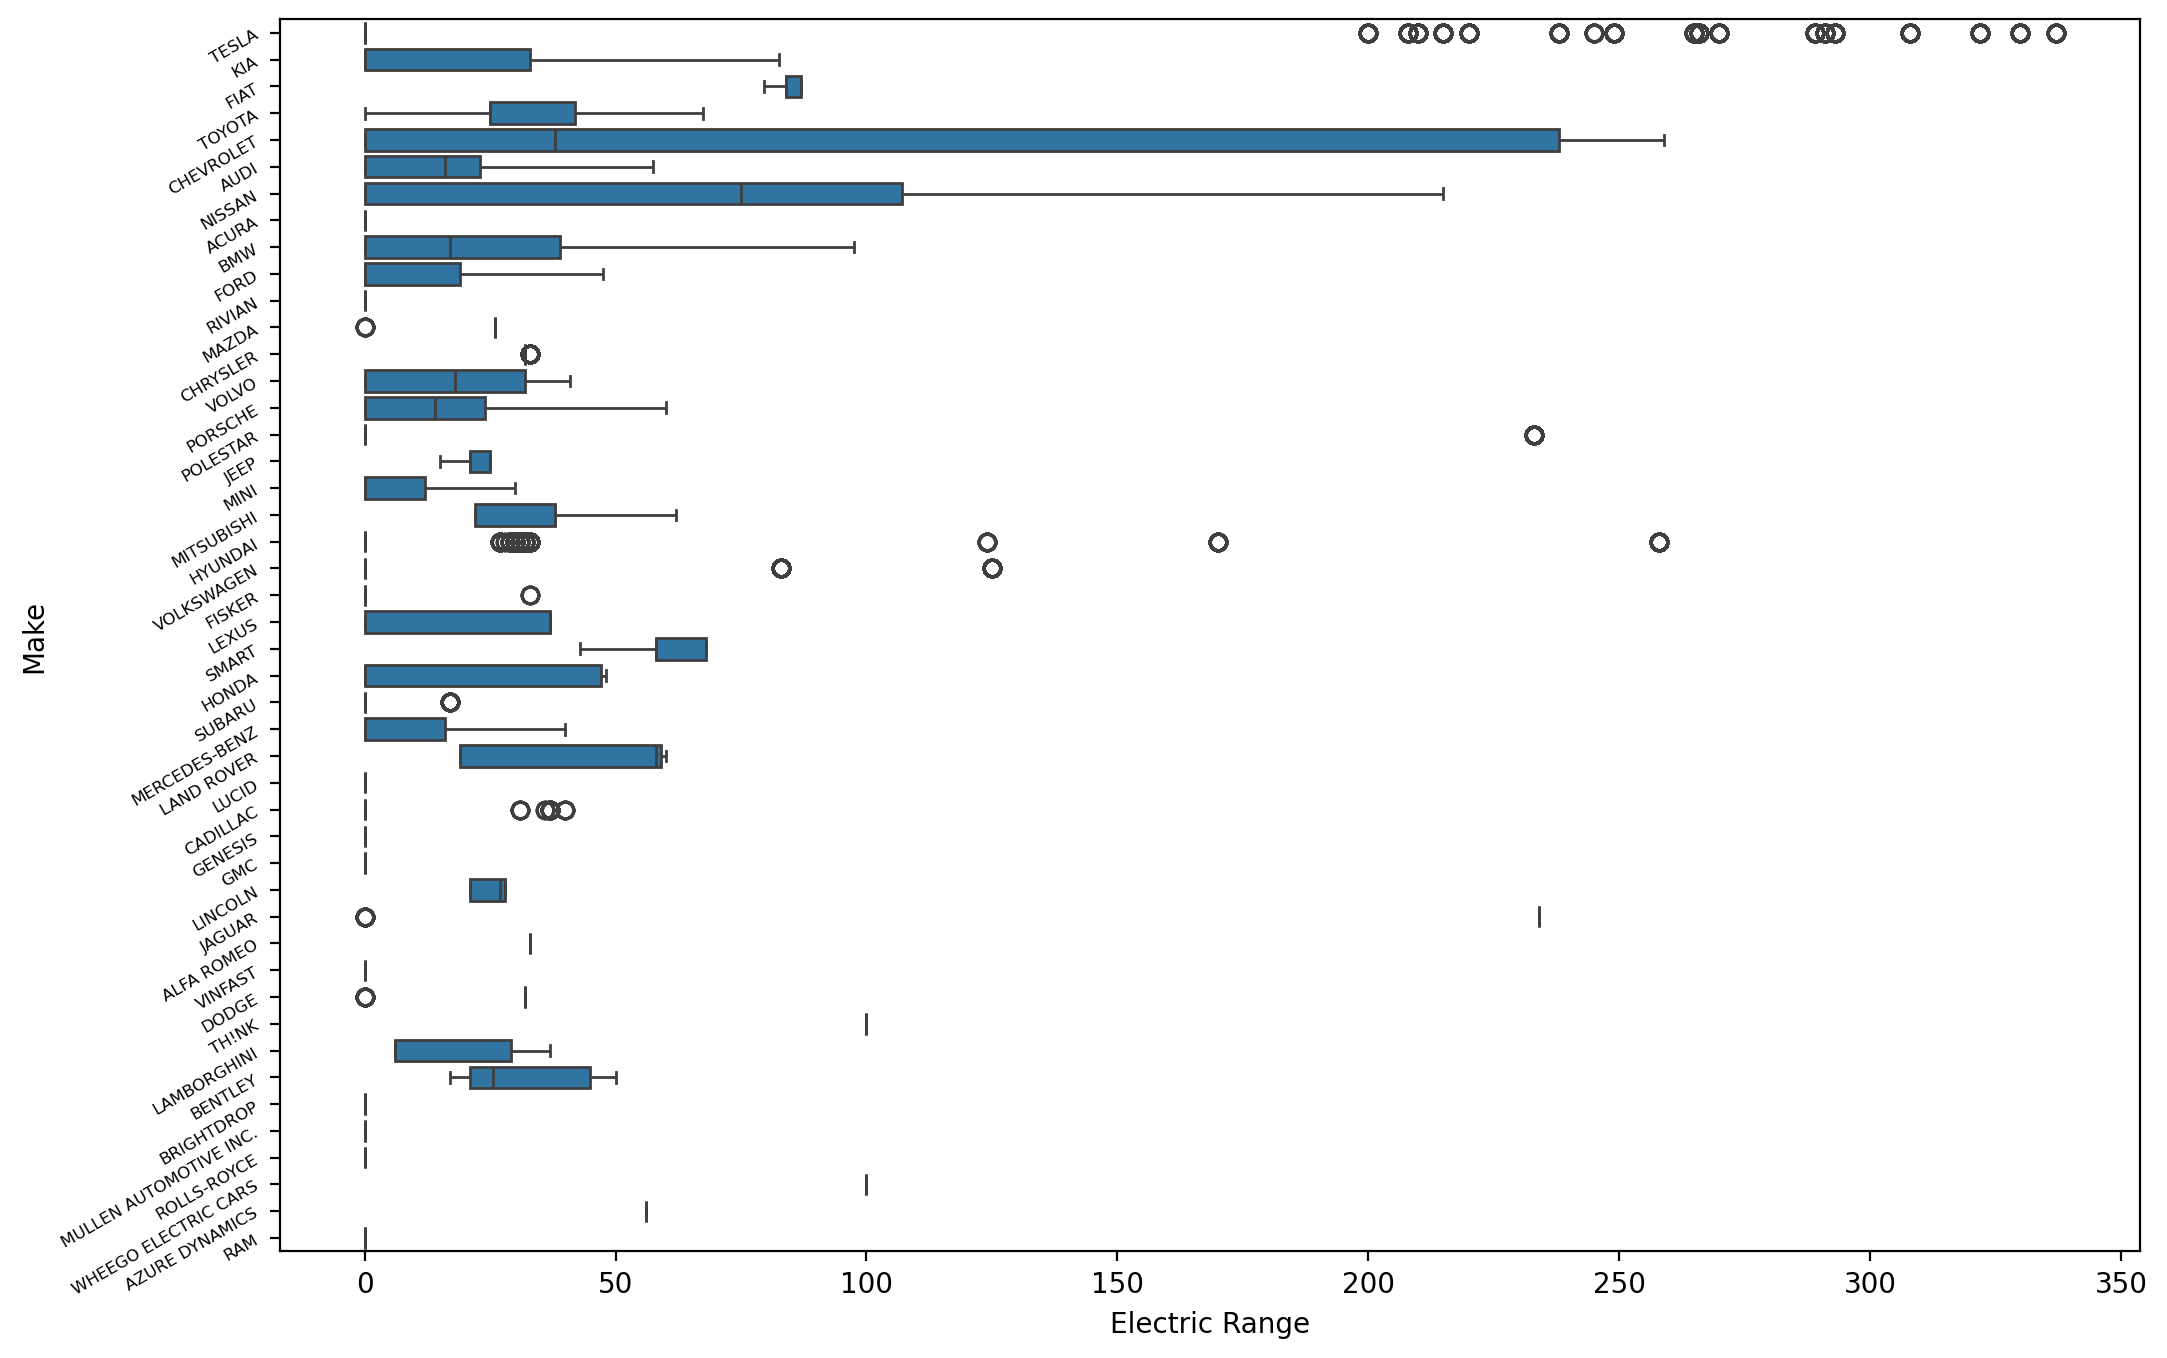

In [53]:
# Apply the function to your DataFrame
df_clean = handle_outliers_iqr(df, column='Electric Range', group_column='Make')

# Create boxplot with the cleaned data
plt.figure(figsize=(12, 8))
plt.yticks(rotation=30, ha='right')
plt.yticks(fontsize=6)
sns.boxplot(data=df_clean, x='Electric Range', y='Make')
plt.show()

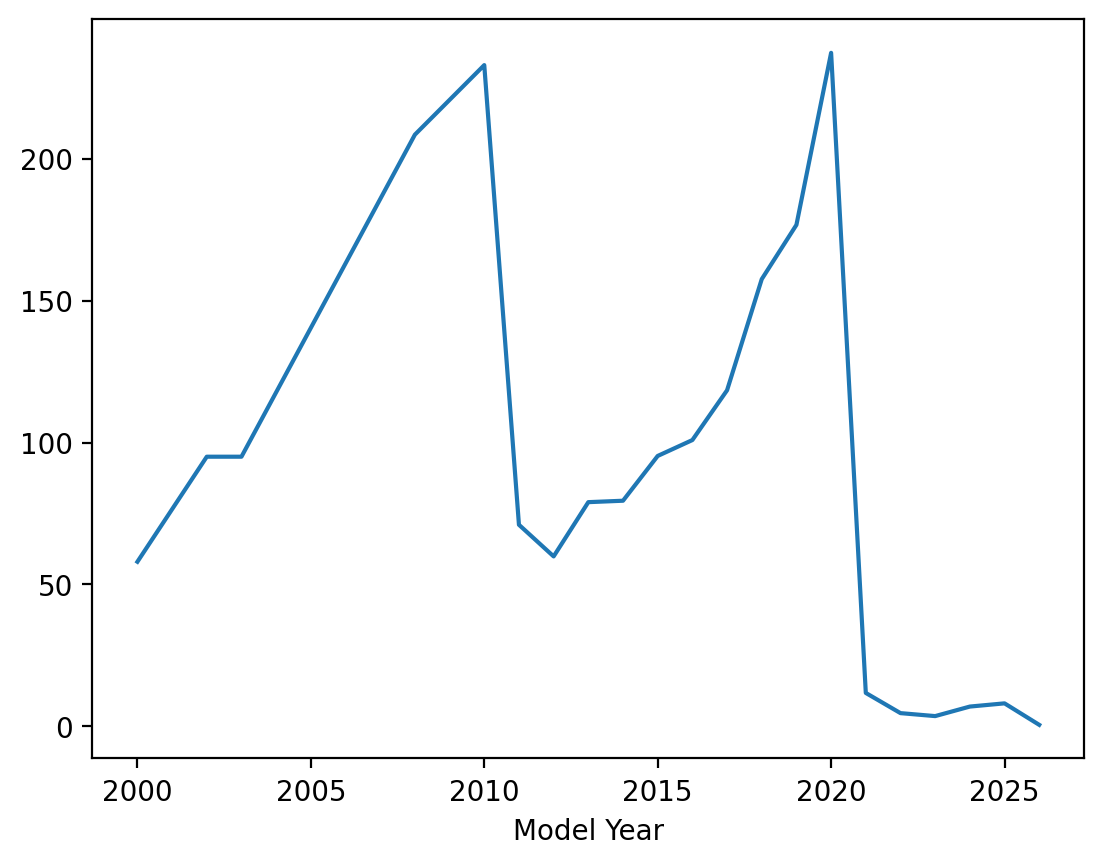

In [54]:
df.groupby('Model Year')['Electric Range'].mean().plot()
plt.show()

The Line Chart showcases how electronic range has changed over the years. It signifies the technological trend that has happened with the ongoing years

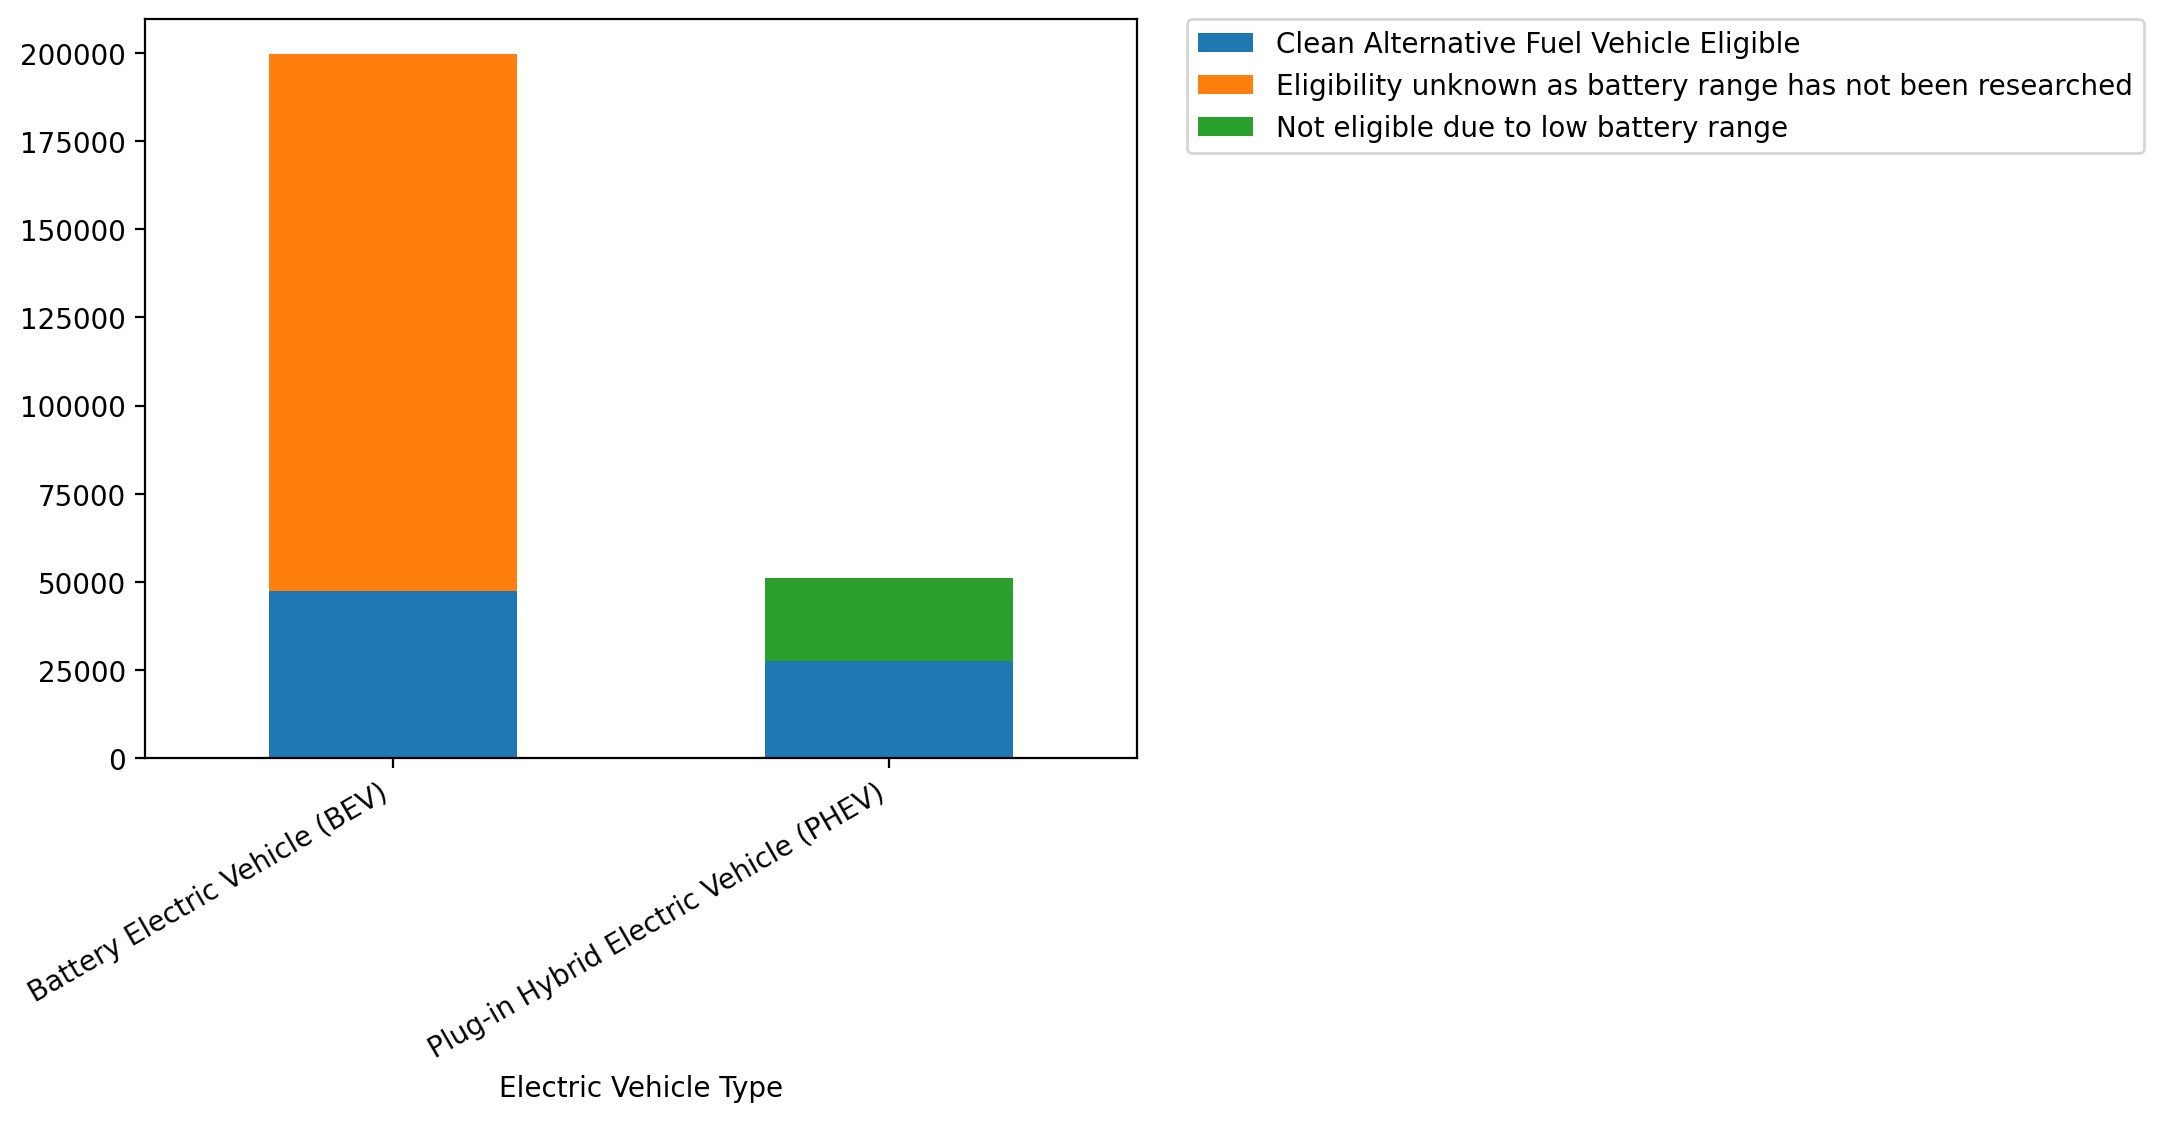

In [56]:
pd.crosstab(df_clean['Electric Vehicle Type'], df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility']).plot(kind='bar', stacked=True)
plt.xticks(rotation=30, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

<h3> How does EV Type and Model Year affect Electric Range?</h3>

In [58]:
# Map categories to numbers
df_clean['EV_Type_Code'] = df_clean['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 0,
    'Plug-in Hybrid Electric Vehicle (PHEV)': 1
})

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean['Make_Code'] = le.fit_transform(df_clean['Make'])

In [60]:
# Map eligibility status to codes
df_clean['CAFV_Code'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map({
    'Clean Alternative Fuel Vehicle Eligible': 1,
    'Not eligible due to low battery range': 0,
    'Eligibility unknown as battery range has not been researched': -1,
})

In [61]:
df_clean['Model_Code'] = le.fit_transform(df_clean['Model'])
df_clean['Electric_Utility_Code'] = le.fit_transform(df_clean['Electric Utility'])

In [62]:

df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

In [63]:
from sklearn.model_selection import train_test_split
X= df_clean[['Model Year','Make_Code','Model_Code','Electric_Utility_Code','EV_Type_Code']]
y= df_clean['CAFV_Code']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3641092160557919
R-squared: 0.5521783723678311


In [65]:
from sklearn.preprocessing import PolynomialFeatures
degree = 5  # Choose the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 4. Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
# 5. Make predictions
y_pred = poly_model.predict(X_test_poly)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.14062370535004384
R-squared: 0.8270454747185698


In [66]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0032989252458750055
R-squared: 0.9959426182917099


In [67]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Initialize models
from sklearn.pipeline import make_pipeline

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Polynomial Regression (deg=5)": make_pipeline(
        PolynomialFeatures(degree=5), 
        LinearRegression()
    )
}

# Configure cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_results = cross_val_score(
        model, X_train, y_train, 
        cv=kfold, scoring=scoring['R2'], n_jobs=-1
    )
    mse_scores = -cross_val_score(
        model, X_train, y_train,
        cv=kfold, scoring=scoring['MSE'], n_jobs=-1
    )
    
    results[name] = {
        'R2_mean': np.mean(cv_results),
        'R2_std': np.std(cv_results),
        'MSE_mean': np.mean(mse_scores),
        'MSE_std': np.std(mse_scores)
    }

# Print results
print("Cross-Validation Results:")
for model, scores in results.items():
    print(f"{model}:")
    print(f"  R²: {scores['R2_mean']:.4f} ± {scores['R2_std']:.4f}")
    print(f"  MSE: {scores['MSE_mean']:.4f} ± {scores['MSE_std']:.4f}\n")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['R2_mean'])
print(f"Best Model: {best_model_name}")

Cross-Validation Results:
Linear Regression:
  R²: 0.5524 ± 0.0026
  MSE: 0.3630 ± 0.0023

Decision Tree:
  R²: 0.9954 ± 0.0003
  MSE: 0.0038 ± 0.0003

Polynomial Regression (deg=5):
  R²: 0.8321 ± 0.0024
  MSE: 0.1361 ± 0.0020

Best Model: Decision Tree


## Conclusion
1. The objective to answer what explains the Clean Alternative Fuel Vehicle (CAFV) Eligibility is best explained by the independent variables like Model Year, Car Company(Make),Electric_Utility_Code, Electric Vehicle Type
2. The EDA on the dataset 
3. Decision Tree Regressor best explains the model with 99% accuracy